<a href="https://colab.research.google.com/github/KARTHIK01122004/dv_task/blob/main/task_1_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data:
         Date Region   Product  Quantity  Price
0  2025-07-01  South       Pen        10      5
1  2025-07-02  South    Pencil        15      3
2  2025-07-03  South  Notebook         5     20
3  2025-07-04  South    Eraser        20      2
4  2025-07-05  South       Pen        12      5

Missing Values before cleaning:
Date        0
Region      0
Product     0
Quantity    0
Price       0
dtype: int64

Prepared Data:
        Date Region   Product  Quantity  Price  Revenue
0 2025-07-01  South       Pen        10      5       50
1 2025-07-02  South    Pencil        15      3       45
2 2025-07-03  South  Notebook         5     20      100
3 2025-07-04  South    Eraser        20      2       40
4 2025-07-05  South       Pen        12      5       60


/tmp/ipython-input-582480135.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(0, inplace=True)
/tmp/ipython-input-582480135.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

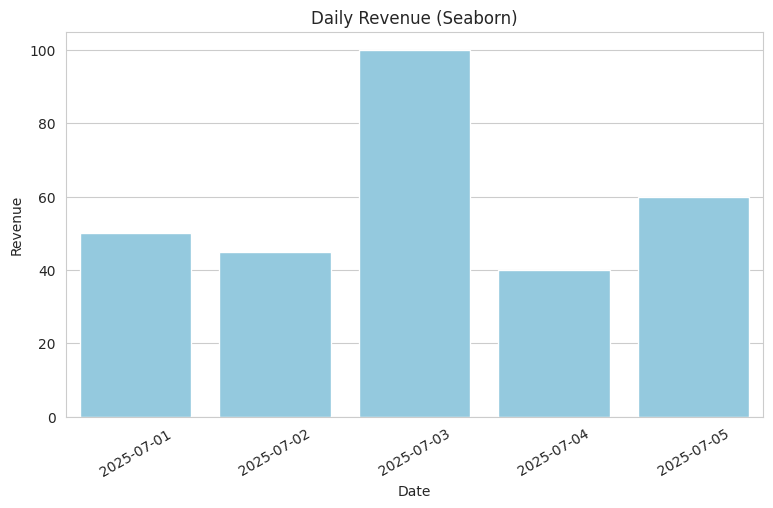

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load dataset
df = pd.read_csv("south_region_sales.csv")

print("Original Data:")
print(df.head())

print("\nMissing Values before cleaning:")
print(df.isnull().sum())

# Handle missing values (only for existing columns)
df['Quantity'].fillna(0, inplace=True)
df['Price'].fillna(0, inplace=True)

# Convert date
df['Date'] = pd.to_datetime(df['Date'])

# Create Revenue column
df['Revenue'] = df['Quantity'] * df['Price']

print("\nPrepared Data:")
print(df.head())

# Group by daily revenue
daily_revenue = df.groupby(df['Date'])['Revenue'].sum().reset_index()

# ---- Seaborn Plot ----
sns.set_style("whitegrid")
plt.figure(figsize=(9, 5))
sns.barplot(data=daily_revenue, x="Date", y="Revenue", color="skyblue")
plt.xticks(rotation=30)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Daily Revenue (Seaborn)")
plt.show()

# ---- Plotly Plot ----
fig = px.line(
    daily_revenue,
    x="Date",
    y="Revenue",
    title="Daily Revenue - South Region",
    markers=True,
    labels={"Date": "Date", "Revenue": "Revenue"}
)
fig.show()